In [39]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gpiosenka_musical_instruments_image_classification_path = kagglehub.dataset_download('gpiosenka/musical-instruments-image-classification')

print('Data source import complete.')
print('Data source path:', gpiosenka_musical_instruments_image_classification_path)


Data source import complete.
Data source path: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1


In [40]:
print(f"The dataset has been downloaded to: {gpiosenka_musical_instruments_image_classification_path}")

# Optionally, you can also check the directory structure
import os
print("Files in the dataset directory:")
print(os.listdir(gpiosenka_musical_instruments_image_classification_path))

The dataset has been downloaded to: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1
Files in the dataset directory:
['6 test samples', 'class_dict.csv', 'EfficientNetB3-instruments-99.33.h5', 'instruments.csv', 'test', 'train', 'valid']


In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Basic imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import cv2
import random
from keras.utils import img_to_array, load_img
from keras.models import Sequential  # Fixed typo: 'Sequentials' → 'Sequential'
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,GlobalAveragePooling2D  # Fixed typo: 'flatten' → 'Flatten'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Fixed typo: 'Earlystopping' → 'EarlyStopping'
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
# Adjusting paths to the dataset after downloading it from Kaggle
train_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train"
test_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test"


# Verify the paths
import os
print(f"Train Path: {train_path}")
print(f"Test Path: {test_path}")

# Check if directories exist
print("Train directory exists:", os.path.exists(train_path))
print("Test directory exists:", os.path.exists(test_path))


Train Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train
Test Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test
Train directory exists: True
Test directory exists: True


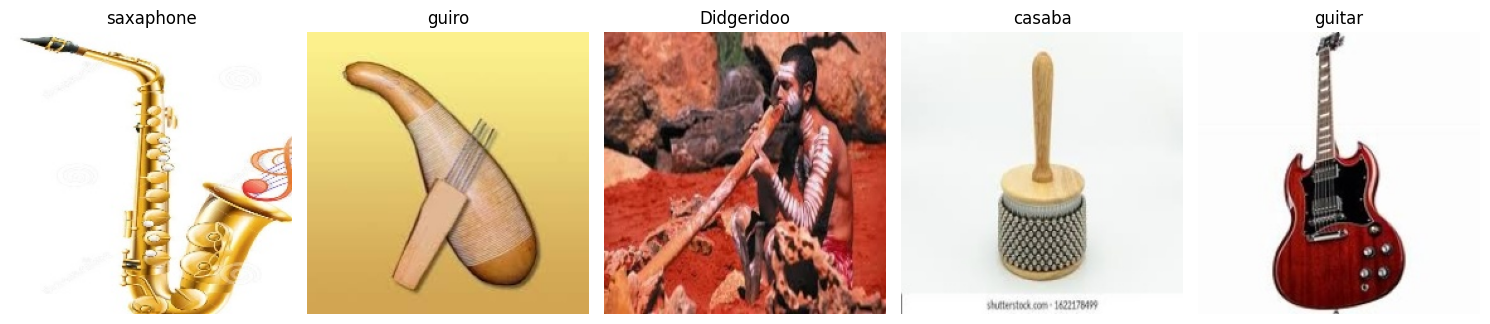

In [43]:
from tensorflow.keras.utils import load_img
from keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img

class_folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

# Pick 5 random classes (or all if less than 5)
random_classes = random.sample(class_folders, min(5, len(class_folders)))

# Plot settings
plt.figure(figsize=(15, 5))

for idx, class_name in enumerate(random_classes):
    class_path = os.path.join(train_path, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)
        img = load_img(img_path)

        plt.subplot(1, 5, idx + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [44]:
# Check the number of classes in the dataset
num_classes = len(class_folders)

In [45]:
# Check the number of images in each class
class_counts = {folder: len(os.listdir(os.path.join(train_path, folder))) for folder in class_folders}

In [46]:
# Plot the class distribution
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Class Names')

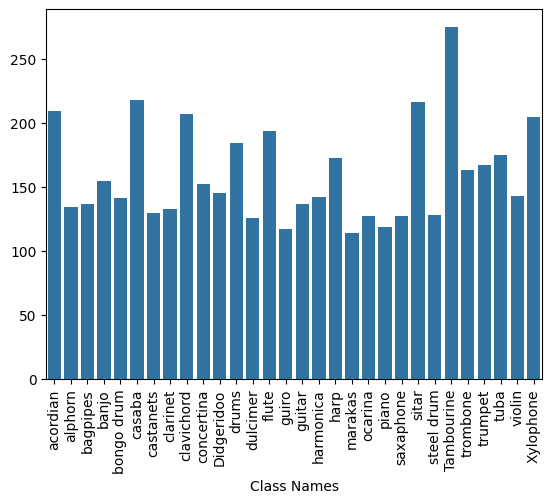

In [47]:
# Plotting the class distribution
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.xlabel('Class Names')

In [49]:
# Check the number of images in the training and test directories
train_images = len(os.listdir(train_path))
test_images = len(os.listdir(test_path))
print(f"Number of training images: {train_images}")
print(f"Number of test images: {test_images}")


Number of training images: 30
Number of test images: 30


In [50]:
# Check the number of images in each class in the training set
train_class_counts = {folder: len(os.listdir(os.path.join(train_path, folder))) for folder in class_folders}
print("Number of images in each class in the training set:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")
# Check the number of images in each class in the test set
test_class_counts = {folder: len(os.listdir(os.path.join(test_path, folder))) for folder in class_folders}
print("Number of images in each class in the test set:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")
# Set image dimensions
img_width, img_height = 150, 150

Number of images in each class in the training set:
acordian: 209 images
alphorn: 134 images
bagpipes: 137 images
banjo: 155 images
bongo drum: 141 images
casaba: 218 images
castanets: 130 images
clarinet: 133 images
clavichord: 207 images
concertina: 152 images
Didgeridoo: 145 images
drums: 184 images
dulcimer: 126 images
flute: 194 images
guiro: 117 images
guitar: 137 images
harmonica: 142 images
harp: 173 images
marakas: 114 images
ocarina: 127 images
piano: 119 images
saxaphone: 127 images
sitar: 216 images
steel drum: 128 images
Tambourine: 275 images
trombone: 163 images
trumpet: 167 images
tuba: 175 images
violin: 143 images
Xylophone: 205 images
Number of images in each class in the test set:
acordian: 5 images
alphorn: 5 images
bagpipes: 5 images
banjo: 5 images
bongo drum: 5 images
casaba: 5 images
castanets: 5 images
clarinet: 5 images
clavichord: 5 images
concertina: 5 images
Didgeridoo: 5 images
drums: 5 images
dulcimer: 5 images
flute: 5 images
guiro: 5 images
guitar: 5 i

In [51]:
#Parameters
input_shape = (224, 224, 3)
BatchSize = 64
seed = 42
num_classes = 30

In [52]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

In [53]:
# Data Generator for Training Data
train_generator = train_datagen.flow_from_directory(train_path,
                                                      target_size=input_shape[:2],
                                                      batch_size=BatchSize,
                                                      class_mode='categorical',
                                                      seed=seed)

Found 4793 images belonging to 30 classes.


In [54]:
# Data Generator for Validation Data
validation_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
# Data Generator for Validation Data
validation_generator = validation_datagen.flow_from_directory(test_path,
                                                                target_size=input_shape[:2],
                                                                batch_size=BatchSize,
                                                                class_mode='categorical',
                                                                seed=seed)

Found 150 images belonging to 30 classes.


In [56]:
# Check the class indices
class_indices = train_generator.class_indices

In [57]:
# Check the class indices
print("Class Indices:")
print(class_indices)

Class Indices:
{'Didgeridoo': 0, 'Tambourine': 1, 'Xylophone': 2, 'acordian': 3, 'alphorn': 4, 'bagpipes': 5, 'banjo': 6, 'bongo drum': 7, 'casaba': 8, 'castanets': 9, 'clarinet': 10, 'clavichord': 11, 'concertina': 12, 'drums': 13, 'dulcimer': 14, 'flute': 15, 'guiro': 16, 'guitar': 17, 'harmonica': 18, 'harp': 19, 'marakas': 20, 'ocarina': 21, 'piano': 22, 'saxaphone': 23, 'sitar': 24, 'steel drum': 25, 'trombone': 26, 'trumpet': 27, 'tuba': 28, 'violin': 29}


In [58]:
# Check the number of classes
num_classes = len(class_indices)
print("Number of Classes:")
print(num_classes)


Number of Classes:
30


In [59]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,278,686 (73.54 MB)

 Trainable params: 19,278,686 (73.54 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [62]:
# Define the checkpoint callback to save the best model
checkpoint_path = "best_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr, checkpoint])

C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0572 - loss: 3.4440
Epoch 1: val_accuracy improved from -inf to 0.12667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.0574 - loss: 3.4426 - val_accuracy: 0.1267 - val_loss: 3.0572 - learning_rate: 0.0010
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1110 - loss: 3.1738
Epoch 2: val_accuracy improved from 0.12667 to 0.13333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.1111 - loss: 3.1734 - val_accuracy: 0.1333 - val_loss: 2.9214 - learning_rate: 0.0010
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1484 - loss: 3.0261
Epoch 3: val_accuracy improved from 0.13333 to 0.21333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.1485 - loss: 3.0258 - val_accuracy: 0.2133 - val_loss: 2.8907 - learning_rate: 0.0010
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1748 - loss: 2.9152
Epoch 4: val_accuracy improved from 0.21333 to 0.32000, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.1749 - loss: 2.9146 - val_accuracy: 0.3200 - val_loss: 2.3522 - learning_rate: 0.0010
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2292 - loss: 2.7648
Epoch 5: val_accuracy improved from 0.32000 to 0.34000, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 283s 4s/step - accuracy: 0.2292 - loss: 2.7645 - val_accuracy: 0.3400 - val_loss: 2.2415 - learning_rate: 0.0010
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2596 - loss: 2.5903
Epoch 6: val_accuracy improved from 0.34000 to 0.47333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.2597 - loss: 2.5899 - val_accuracy: 0.4733 - val_loss: 2.0334 - learning_rate: 0.0010
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2928 - loss: 2.4792
Epoch 7: val_accuracy did not improve from 0.47333
75/75 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.2929 - loss: 2.4790 - val_accuracy: 0.3867 - val_loss: 2.1923 - learning_rate: 0.0010
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 40s/step - accuracy: 0.3423 - loss: 2.3237 
Epoch 8: val_accuracy improved from 0.47333 to 0.52667, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 2985s 40s/step - accuracy: 0.3423 - loss: 2.3238 - val_accuracy: 0.5267 - val_loss: 1.9690 - learning_rate: 0.0010
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3479 - loss: 2.2573
Epoch 9: val_accuracy did not improve from 0.52667
75/75 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.3481 - loss: 2.2568 - val_accuracy: 0.5267 - val_loss: 1.6007 - learning_rate: 0.0010
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3792 - loss: 2.1383
Epoch 10: val_accuracy improved from 0.52667 to 0.63333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.3793 - loss: 2.1378 - val_accuracy: 0.6333 - val_loss: 1.4456 - learning_rate: 0.0010
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3931 - loss: 2.0557
Epoch 11: val_accuracy did not improve from 0.63333
75/75 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.3933 - loss: 2.0554 - val_accuracy: 0.6133 - val_loss: 1.5845 - learning_rate: 0.0010
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4110 - loss: 2.0107
Epoch 12: val_accuracy did not improve from 0.63333
75/75 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.4111 - loss: 2.0106 - val_accuracy: 0.5933 - val_loss: 1.2973 - learning_rate: 0.0010
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4262 - loss: 1.9581
Epoch 13: val_accuracy did not improve from 0.63333
75/75 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.4266 - loss: 1.9573 - val_accuracy: 0.5533 - val_loss: 1.4586 - learning_rate: 0.0010
Epoch 14/50
75/75 ━━━━━━━━━━━━━━

75/75 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.4691 - loss: 1.8108 - val_accuracy: 0.6400 - val_loss: 1.2768 - learning_rate: 0.0010
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4921 - loss: 1.7907
Epoch 15: val_accuracy did not improve from 0.64000
75/75 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.4920 - loss: 1.7906 - val_accuracy: 0.5800 - val_loss: 1.4424 - learning_rate: 0.0010
Epoch 16/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4857 - loss: 1.7706
Epoch 16: val_accuracy improved from 0.64000 to 0.67333, saving model to best_model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.4858 - loss: 1.7702 - val_accuracy: 0.6733 - val_loss: 0.9630 - learning_rate: 0.0010
Epoch 17/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4999 - loss: 1.6857
Epoch 17: val_accuracy did not improve from 0.67333
75/75 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.4999 - loss: 1.6856 - val_accuracy: 0.5800 - val_loss: 1.7127 - learning_rate: 0.0010
Epoch 18/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5285 - loss: 1.6083
Epoch 18: val_accuracy did not improve from 0.67333
75/75 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.5285 - loss: 1.6086 - val_accuracy: 0.6667 - val_loss: 1.0997 - learning_rate: 0.0010
Epoch 19/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5376 - loss: 1.5839
Epoch 19: val_accuracy did not improve from 0.67333
75/75 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5375 - loss: 1.5840 - val_accuracy: 0.6067 - val_loss: 1.5620 - learning_rate: 0.0010
Epoch 20/50
75/75 ━━━━━━━━━━━━━━━

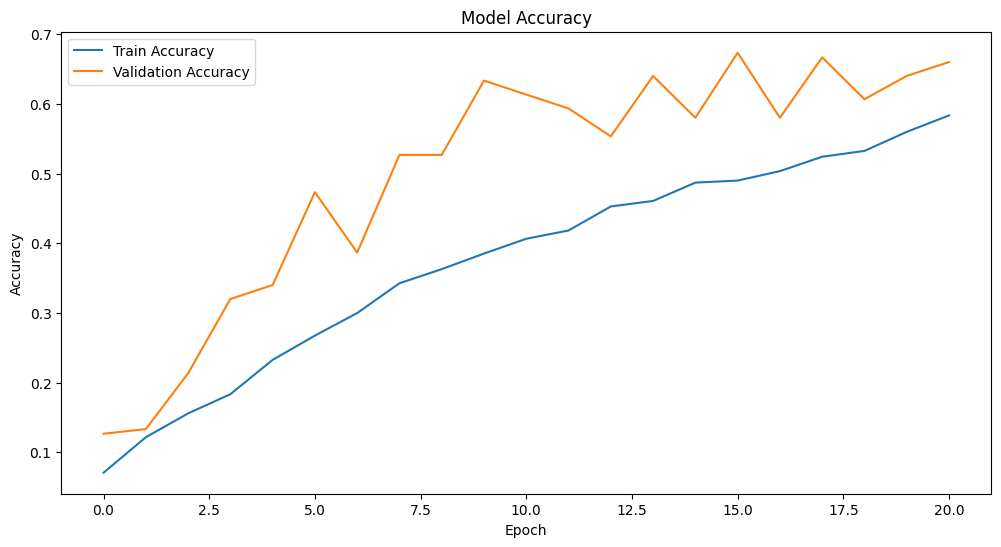

In [63]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


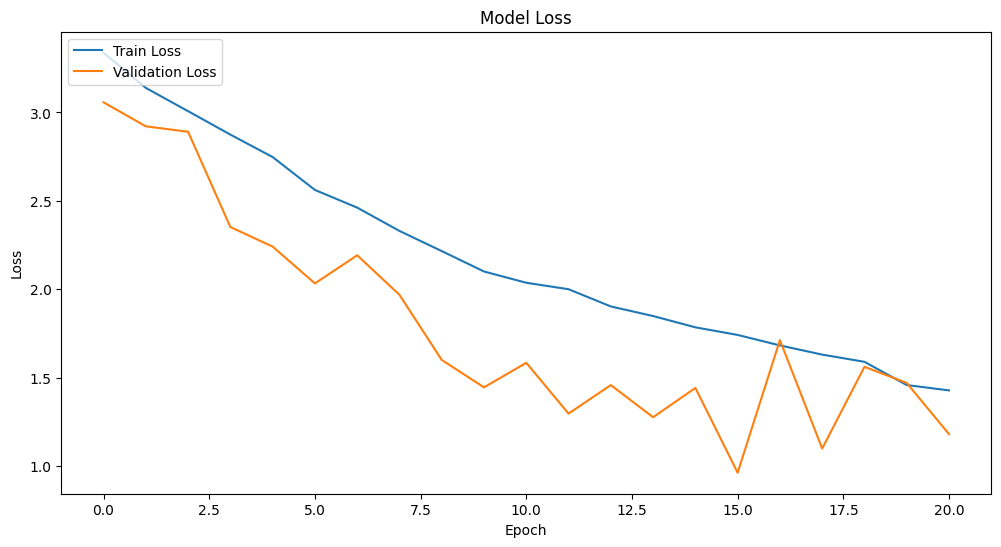

In [64]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [65]:
# Load the best model
from keras.models import load_model
best_model = load_model(checkpoint_path)
# Evaluate the model on the validation set
validation_loss, validation_accuracy = best_model.evaluate(validation_generator, verbose=1)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")
# Make predictions on the validation set
predictions = best_model.predict(validation_generator, verbose=1)
# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)
# Get the true class indices
true_classes = validation_generator.classes
# Get the class labels
class_labels = list(validation_generator.class_indices.keys())



3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.6863 - loss: 0.9577
Validation Loss: 0.9630234837532043
Validation Accuracy: 0.6733333468437195
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ---------------------- Predict on Test Set ----------------------
# Get the true labels
true_labels = test_generator.classes

# Get the class indices to label map
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Predict probabilities
pred_probs = model.predict(test_generator, verbose=1)
# Convert probabilities to predicted class indices
pred_labels = np.argmax(pred_probs, axis=1)

# ---------------------- Confusion Matrix ----------------------
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ---------------------- Classification Report ----------------------
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_labels))



NameError: name 'test_generator' is not defined

In [ ]:
# Save the model
model.save("musical_instruments_model.h5")